In [1]:
pip install diagrams

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached typed_ast-1.5.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.1 MB/s eta 0:00:00a 0:00:01
Using cached typed_ast-1.5.5-cp39-cp39-macosx_11_0_arm64.whl (208 kB)
Note: you may need to restart the kernel to use updated packages.


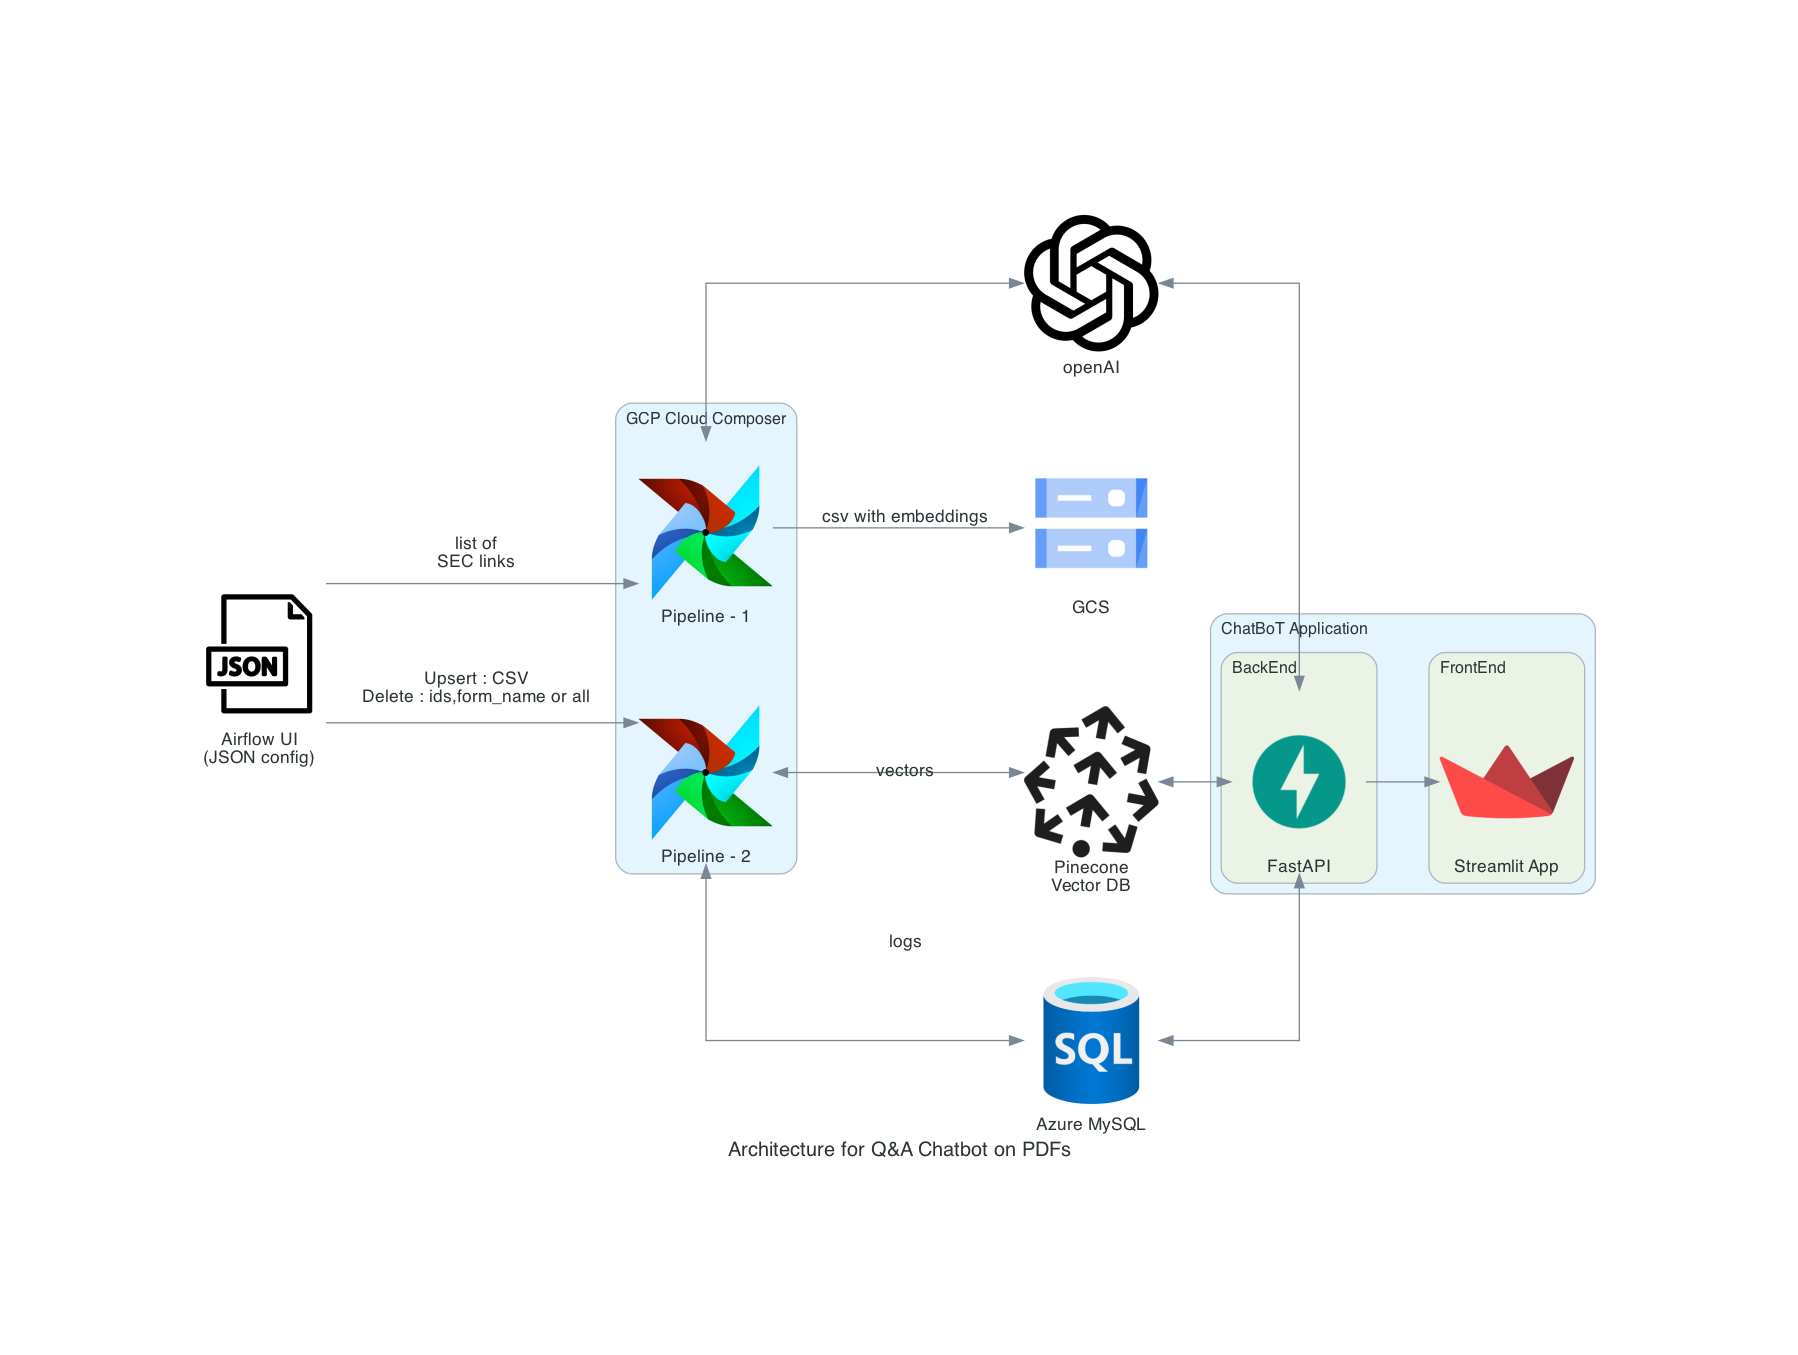

In [1]:
# /Users/uddhavzambare/Northeastern/Big_Data_Analytics_and_Intelligent_Systems/Assignments/Assignment3

from diagrams import Diagram, Cluster, Edge, Node
from diagrams.custom import Custom
from diagrams.gcp.storage import GCS
from diagrams.azure.database import SQLDatabases
from diagrams.onprem.compute import Server
from diagrams.onprem.network import Internet
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI

with Diagram("Architecture for Q&A Chatbot on PDFs", show=False, direction="LR", outformat="png") as diagram:
    openAI = Custom("openAI", "./images/openai.png")
    googleGCS = GCS("GCS")
    pinecone = Custom("Pinecone\nVector DB", "./images/pinecone.png")
    azureSQL = SQLDatabases("Azure MySQL")

    # Define the user and Streamlit App
    with Cluster("GCP Cloud Composer"):
        pipeline1 = Custom("Pipeline - 1", "./images/airflow.png")
        pipeline2 = Custom("Pipeline - 2", "./images/airflow.png")
        
    with Cluster("ChatBoT Application"):    
        with Cluster("BackEnd"):
            fastapi = FastAPI("FastAPI")
        with Cluster("FrontEnd"):
            streamlit = Custom("Streamlit App", "./images/streamlit.png")

    airflow = Custom("Airflow UI\n(JSON config)", "./images/json.png")

    # # Add connection links

    pipeline1>>Edge()<<openAI>>Edge()<<fastapi
    pipeline1>>Edge(label="csv with embeddings")>>googleGCS
    pipeline2>>Edge(label="vectors")<<pinecone>>Edge()<<fastapi
    pipeline2>>Edge(label="logs")<<azureSQL>>Edge()<<fastapi

    airflow>>Edge(label="list of\nSEC links")>>pipeline1
    airflow>>Edge(label="Upsert : CSV\nDelete : ids,form_name or all")>>pipeline2

    fastapi>>Edge()>>streamlit
    
diagram